In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('model_steel.csv')
df.head()

,Date,Price,Open,High,Low
0,2014-04-01,36.11,35.50,36.29,34.76
1,2014-04-02,36.31,36.27,36.44,35.91
2,2014-04-03,35.86,36.27,37.07,35.51
3,2014-04-04,36.17,36.03,36.40,35.59
4,2014-04-07,36.53,36.53,36.81,35.85


In [5]:
df.tail()

,Date,Price,Open,High,Low
2463,2024-03-18,149.60,143.85,150.25,142.20
2464,2024-03-19,148.65,149.55,152.55,147.55
2465,2024-03-20,145.70,149.70,150.70,143.85
2466,2024-03-21,150.15,148.05,151.15,147.90
2467,2024-03-22,151.50,148.05,152.75,148.60


In [6]:
cop = df.reset_index()['Price']
cop

0        36.11
1        36.31
2        35.86
3        36.17
4        36.53
         ...  
2463    149.60
2464    148.65
2465    145.70
2466    150.15
2467    151.50
Name: Price, Length: 2468, dtype: float64

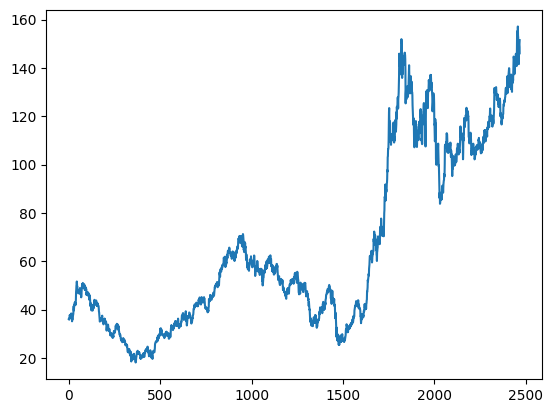

In [7]:
plt.plot(cop)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
cop = scaler.fit_transform(np.array(cop).reshape(-1,1))

In [9]:
len(cop)

2468

In [10]:
trainingSize = int(len(cop)*0.80)
testSize = len(cop)-trainingSize

train_data, test_data = cop[0:trainingSize,:],cop[trainingSize:len(cop),:1]

In [11]:
len(train_data),len(test_data)

(1974, 494)

In [12]:
def create_data(data,time_step):
    X, y = [],[]
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step),0]
        b = data[i+time_step,0]
        X.append(a)
        y.append(b)

    return np.array(X), np.array(y)

In [13]:
time_step = 100
X_train, y_train = create_data(train_data,time_step)
X_test, y_test = create_data(test_data,time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(1873, 100)
(1873,)


(None, None)

In [15]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [17]:
def buildModel(input_shape):
    input_layer = Input(shape=input_shape)
    model = LSTM(units=128,return_sequences=True)(input_layer)
    model = Dropout(0.2)(model)
    model = LSTM(units=128,return_sequences=True)(model)
    model = Dropout(0.2)(model)
    model = LSTM(units=128,return_sequences=False)(model)
    model = Dropout(0.2)(model)
    model = Dense(64,activation='relu')(model)
    model = Dropout(0.2)(model)
    model = Dense(64,activation='relu')(model)
    output_layer = Dense(1)(model)
    neuron = Model(inputs=input_layer,outputs=output_layer)
    neuron.compile(loss='mean_squared_error',optimizer='adam')
    return neuron

In [18]:
clf = buildModel((100,1))
clf.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 342,209 (1.31 MB)

 Trainable params: 342,209 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
hist = clf.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - loss: 0.0330 - val_loss: 0.0037
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 0.0029 - val_loss: 0.0075
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - loss: 0.0017 - val_loss: 0.0094
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - loss: 0.0014 - val_loss: 0.0094
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step

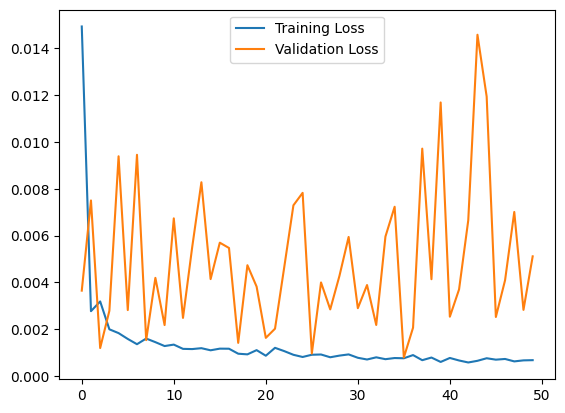

In [20]:
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [21]:
train_predict=clf.predict(X_train)
test_predict=clf.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [22]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

58.85172887166007

In [24]:
math.sqrt(mean_squared_error(y_test,test_predict))

108.92937609458794

In [25]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
mae = mean_absolute_error(y_train,train_predict)
maep = mean_absolute_percentage_error(y_train,train_predict)
print(mae,maep)

53.17370409463721 59883181169208.6


In [26]:
mae_pred = mean_absolute_error(y_test,test_predict)
maep_pred = mean_absolute_percentage_error(y_test,test_predict)
print(mae_pred,maep_pred)

108.5333781578432 151.82715207112483


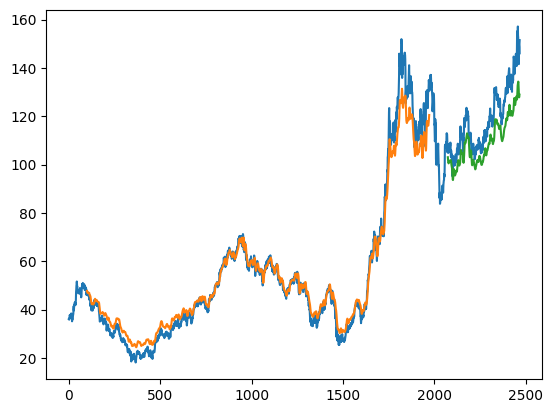

In [27]:
look_back=100
trainPredictPlot = np.empty_like(cop)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(cop)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(cop)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(cop))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [28]:
len(test_data)

494

In [29]:
x_input = test_data[394:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_in = list(x_input)
temp_in = temp_in[0].tolist()

In [31]:
temp_in

[0.7083363302884268,
 0.7194850032367115,
 0.7133712148457166,
 0.7284758685175861,
 0.730993310796231,
 0.7259584262389411,
 0.730633676184996,
 0.7335107530748758,
 0.7389052722434006,
 0.7396245414658706,
 0.7615622527512047,
 0.7665971373084945,
 0.7698338488096094,
 0.7647989642523196,
 0.777745810256779,
 0.776666906423074,
 0.780982521757894,
 0.7752283679781342,
 0.7820614255915989,
 0.7881752139825936,
 0.7899733870387685,
 0.8043587714881678,
 0.8115514637128676,
 0.8162267136589224,
 0.8176652521038624,
 0.8047184060994029,
 0.7989642523196431,
 0.805078040710638,
 0.8057973099331079,
 0.8144285406027475,
 0.8191037905488023,
 0.8507516363374811,
 0.852190174782421,
 0.8435589441127814,
 0.8025605984319929,
 0.8119110983241027,
 0.8298928288858519,
 0.8421204056678413,
 0.8561461555060058,
 0.8633388477307056,
 0.87304898223405,
 0.8759260591239301,
 0.8734086168452851,
 0.8428396748903114,
 0.8352873480543767,
 0.8309717327195569,
 0.8194634251600375,
 0.8309717327195569,
 

In [32]:
lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_in)>100):
        #print(temp_input)
        x_input=np.array(temp_in[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = clf.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_in.extend(yhat[0].tolist())
        temp_in=temp_in[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = clf.predict(x_input, verbose=0)
        print(yhat[0])
        temp_in.extend(yhat[0].tolist())
        print(len(temp_in))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.812561]
101
1 day input [0.719485   0.71337121 0.72847587 0.73099331 0.72595843 0.73063368
 0.73351075 0.73890527 0.73962454 0.76156225 0.76659714 0.76983385
 0.76479896 0.77774581 0.77666691 0.78098252 0.77522837 0.78206143
 0.78817521 0.78997339 0.80435877 0.81155146 0.81622671 0.81766525
 0.80471841 0.79896425 0.80507804 0.80579731 0.81442854 0.81910379
 0.85075164 0.85219017 0.84355894 0.8025606  0.8119111  0.82989283
 0.84212041 0.85614616 0.86333885 0.87304898 0.87592606 0.87340862
 0.84283967 0.83528735 0.83097173 0.81946343 0.83097173 0.83420844
 0.8399626  0.84283967 0.84032223 0.85686542 0.81658635 0.81227073
 0.83492771 0.83276991 0.80543768 0.84176077 0.83097173 0.84068187
 0.83852406 0.84715529 0.83924333 0.86729483 0.88743437 0.91045098
 0.90793354 0.90325829 0.88599583 0.85794433 0.86154067 0.88491692
 0.88527656 0.89354816 0.89031144 0.88419766 0.90433719 0.91872258
 0.91620514 0.89534633 0.906495   0.88203985 0.88311875 0.94857225
 0.98561462 0.9708696  0.96187873 0

In [33]:
scaled_pred = scaler.inverse_transform(lst_output)
print(scaled_pred)

[[131.09035243]
 [129.70300387]
 [126.53856038]
 [122.6126646 ]
 [118.65591694]
 [115.05043987]
 [111.92738083]
 [109.27704422]
 [107.02876821]
 [105.09728128]]


In [34]:
len(cop)

2468

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

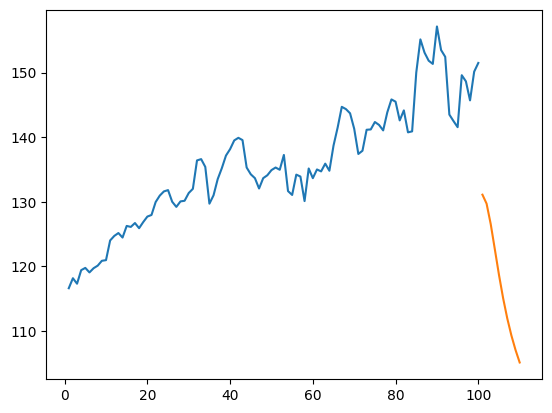

In [36]:
plt.plot(day_new,scaler.inverse_transform(cop[2368:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
from tensorflow.keras.tuners import RandomSearch

In [ ]:
def build_model(hp):
  num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)
  units_per_layer = hp.Int('units_per_layer', min_value=64, max_value=256, step=32)
  dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5)
  learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])

  # Build LSTM model with hypertuned parameters
  model = Sequential()
  for _ in range(num_layers):
    model.add(LSTM(units_per_layer, return_sequences=True, dropout=dropout_rate))
  model.add(LSTM(units_per_layer))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
  return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1
)

In [ ]:
tuner.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
predictions = best_model.predict(X_test)

In [ ]:
train_loss, _ = model.evaluate(X_train, y_train)
val_loss, _ = model.evaluate(X_val, y_val)

# Get predictions for training, validation, and testing sets
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

# Inverse transform predictions back to original scale (if normalized)
train_pred = scaler.inverse_transform(train_pred.squeeze())
val_pred = scaler.inverse_transform(val_pred.squeeze())
test_pred = scaler.inverse_transform(test_pred.squeeze())

# Plot historical data vs predictions (training and validation)
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_data[:, 1], label='Training Data')
plt.plot(train_data[:, 1].shape[0] - len(train_pred), train_pred, label='Training Predictions')

# Plot validation data
plt.plot(train_data.shape[0] + val_data[:, 1], label='Validation Data')
plt.plot(train_data.shape[0] + val_data[:, 1].shape[0] - len(val_pred), val_pred, label='Validation Predictions')

plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.title('Historical Data vs. Predictions (Training & Validation)')
plt.grid(True)
plt.show()

# Plot future price predictions (testing set)
plt.figure(figsize=(8, 5))
plt.plot(test_data[:, 1], label='Actual Prices')
plt.plot(range(len(test_pred)), test_pred, label='Predicted Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.title('Future Price Predictions (Testing Set)')
plt.grid(True)
plt.show()